# Individual Weight Prediction Based On Obesity Dataset Using Support Vector Regression from Scratch

### Project Overview

The project aims to predict the weight of individuals based on obesity data using a Support Vector Regression (SVR) model. Obesity is a significant health concern worldwide, and early prediction can aid in preventive interventions and personalized healthcare strategies. The SVR model will be trained on a dataset containing various features such as age, gender, BMI, lifestyle factors, and possibly genetic markers associated with obesity. The model will then be used to predict the weight of an individual based on their input data.

One of the reasons for my interest in this project is my personal journey from being obese, with a weight of 130 kg, to becoming fit. This transformation has sparked my curiosity about the factors contributing to obesity and the potential for predictive modeling to help others in similar situations. By leveraging SVR and mathematical approaches, this project aims to contribute to the field of obesity research and provide valuable insights for personalized health management strategies.

### Import Library

In [1]:
# Utilities
import pandas as pd
import numpy as np
import random

# Math
import cvxopt

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Dataset Inputs

In [2]:
data = pd.read_csv('./ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


This dataset contains information about individuals and their attributes related to obesity. Here's a brief explanation of each column:

* Gender: The gender of the individual (Male/Female).
* Age: The age of the individual.
* Height: The height of the individual.
* Weight: The weight of the individual.
* Family_history_with_overweight: Indicates whether there is a family history of overweight issues (yes/no).
* FAVC (Frequent consumption of high caloric food): Indicates whether the individual frequently consumes high-calorie food (yes/no).
* FCVC (Frequency of consumption of vegetables): Indicates the frequency of vegetable consumption (1 - Always, 2 - Frequently, 3 - Sometimes, 4 - Rarely, 5 - Never).
* NCP (Number of main meals): Indicates the number of main meals consumed per day (1 - Less than 3, 2 - 3 main meals, 3 - More than 3).
* CAEC (Consumption of food between meals): Indicates the frequency of consuming food between meals (1 - No, 2 - Sometimes, 3 - Frequently, 4 - Always).
* SMOKE: Indicates whether the individual smokes (yes/no).
* CH2O (Consumption of water daily): Indicates the amount of water consumed daily (1 - Less than a liter, 2 - Between 1 and 2 liters, 3 - More than 2 liters).
* SCC (Calories consumption monitoring): Indicates whether the individual monitors their calorie consumption (yes/no).
* FAF (Physical activity frequency): Indicates the frequency of physical activity (0 - Sedentary, 1 - Low, 2 - Medium, 3 - High).
* TUE (Time using technology devices): Indicates the time spent using technology devices (0 - 0-2 hours, 1 - 3-5 hours, 2 - More than 5 hours).
* CALC (Consumption of alcohol): Indicates the frequency of alcohol consumption (0 - No, 1 - Sometimes, 2 - Frequently).
* MTRANS (Mode of transportation): Indicates the mode of transportation used by the individual (Automobile, Bike, Motorbike, Public_Transportation, Walking).
* NObeyesdad: Indicates the obesity level of the individual based on WHO classification (Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III).

#### Check Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Numerical Data

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


#### Categorical Data

In [5]:
cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in cols:
    data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   category
 12  FAF                 

In [6]:
for col in cols:
    print("Variable:", col, "| Number of Unique Data:",data[col].nunique(), "\n| Unique Data:", [x for x in data[col].unique()], "\n")

Variable: Gender | Number of Unique Data: 2 
| Unique Data: ['Female', 'Male'] 

Variable: family_history_with_overweight | Number of Unique Data: 2 
| Unique Data: ['yes', 'no'] 

Variable: FAVC | Number of Unique Data: 2 
| Unique Data: ['no', 'yes'] 

Variable: CAEC | Number of Unique Data: 4 
| Unique Data: ['Sometimes', 'Frequently', 'Always', 'no'] 

Variable: SMOKE | Number of Unique Data: 2 
| Unique Data: ['no', 'yes'] 

Variable: SCC | Number of Unique Data: 2 
| Unique Data: ['no', 'yes'] 

Variable: CALC | Number of Unique Data: 4 
| Unique Data: ['no', 'Sometimes', 'Frequently', 'Always'] 

Variable: MTRANS | Number of Unique Data: 5 
| Unique Data: ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike'] 

Variable: NObeyesdad | Number of Unique Data: 7 
| Unique Data: ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'] 



### EDA

#### Category

In [7]:
def category_EDA(category):
    fig = plt.figure(figsize = (16,5))
    sns.boxplot(x=category, y="Weight", data=data)
    fig.suptitle(f"Distribution of Weight Feature vs {category}", fontsize=20)

##### Weight vs Gender

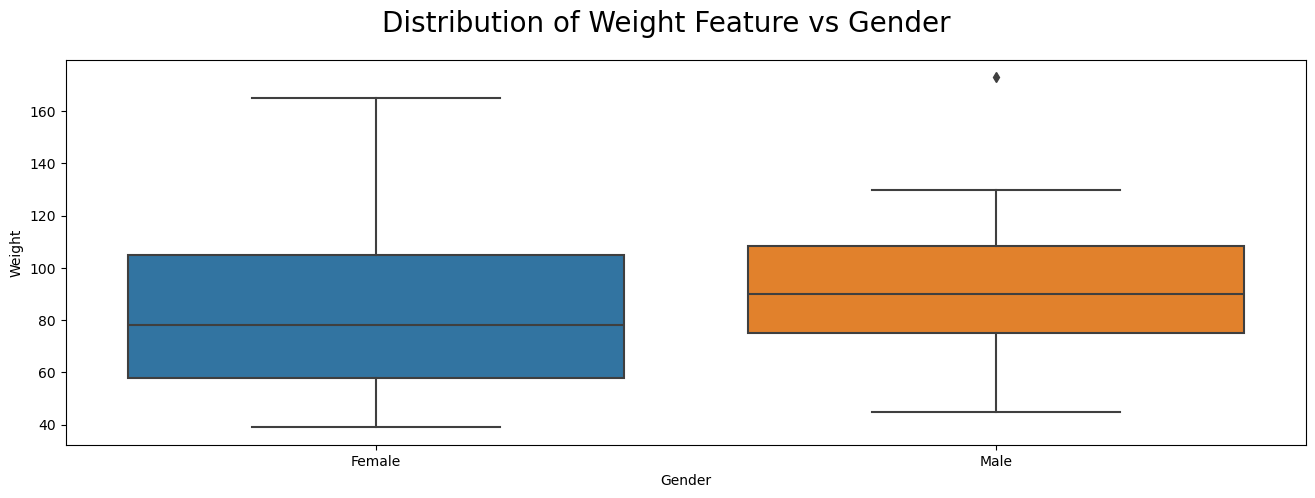

In [8]:
category_EDA("Gender")

Males, on average, weigh more than females.

##### Weight vs Family History with Overweight

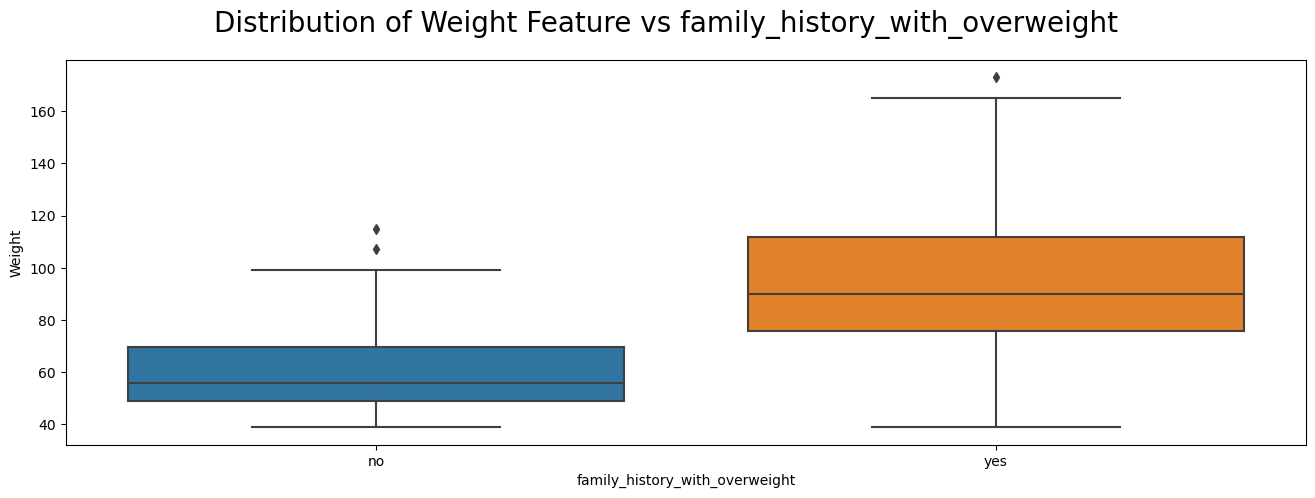

In [9]:
category_EDA("family_history_with_overweight")

There is a moderate positive correlation between family history of overweight and individual weight, suggesting a genetic or environmental influence.

##### Weight vs FAVC

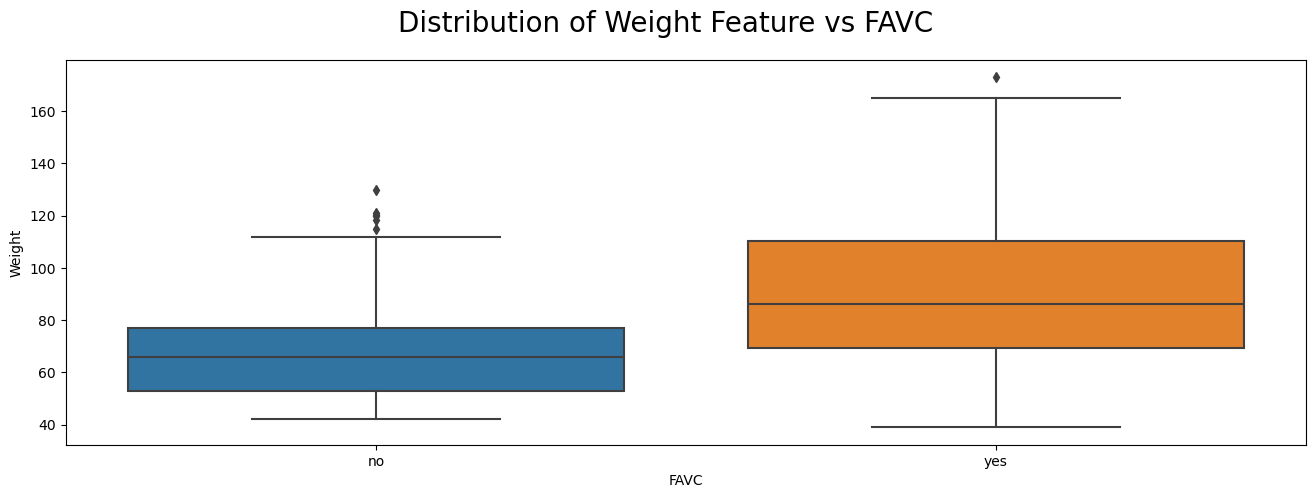

In [10]:
category_EDA("FAVC")

Individuals who frequently consume high-caloric food tend to weigh more.

##### Weight vs CAEC

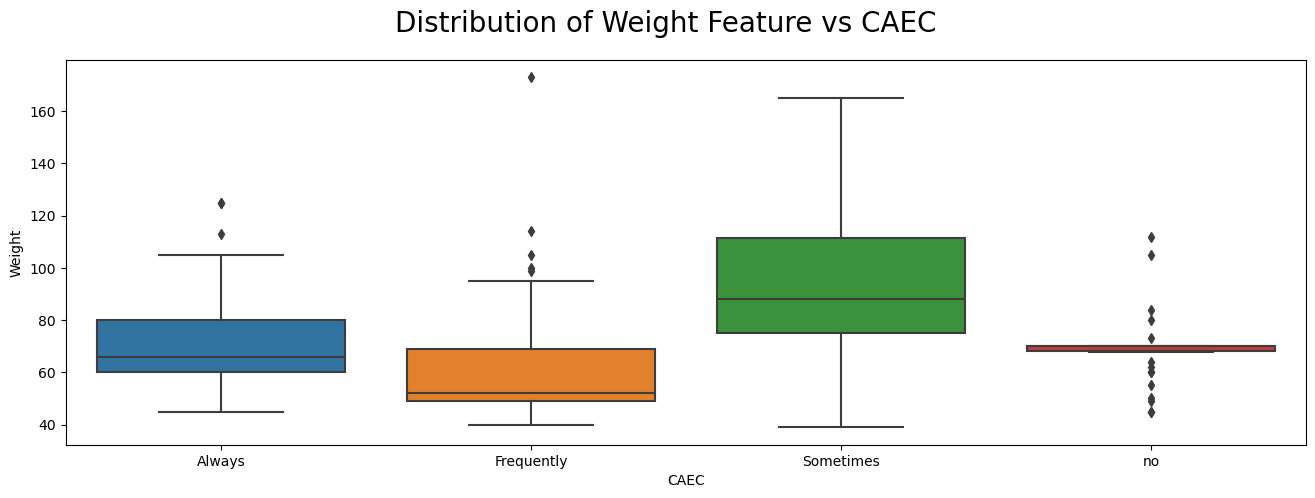

In [11]:
category_EDA("CAEC")

Occasional snacking correlates with the highest average weight, suggesting a potential impact of snacking habits on weight.

##### Weight vs SMOKE

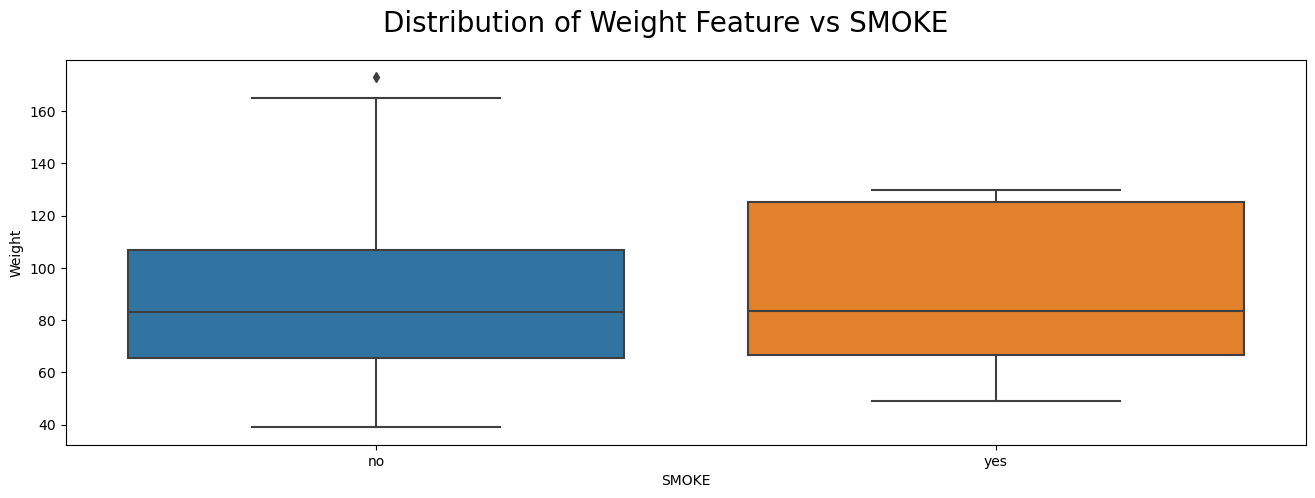

In [12]:
category_EDA("SMOKE")

Smokers, on average, weigh more than non-smokers.

##### Weight vs SCC

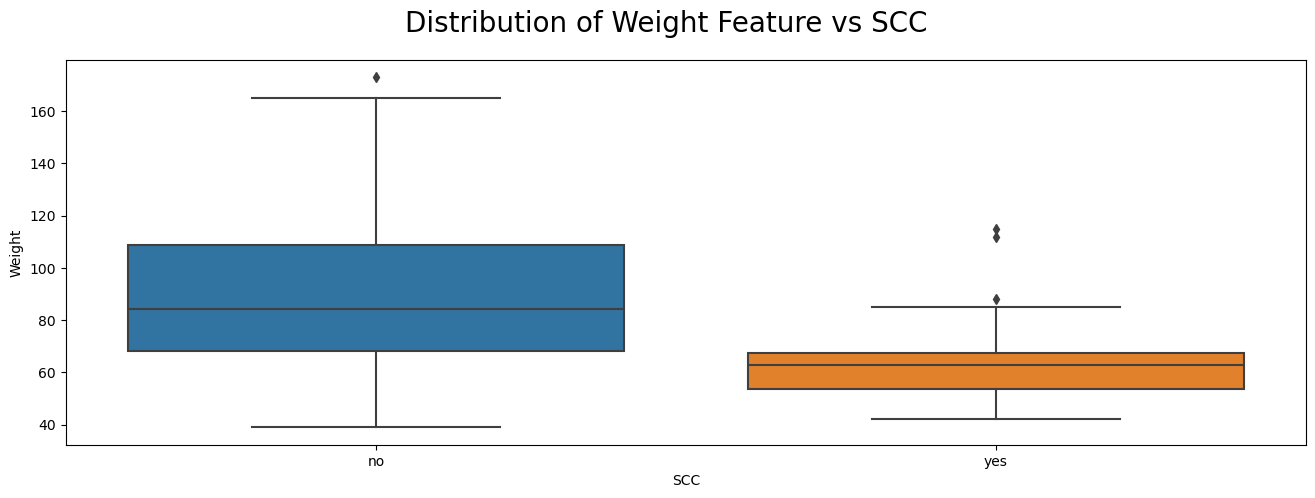

In [13]:
category_EDA("SCC")

Those who monitor their calorie consumption may weigh slightly less.

##### Weight vs CALC

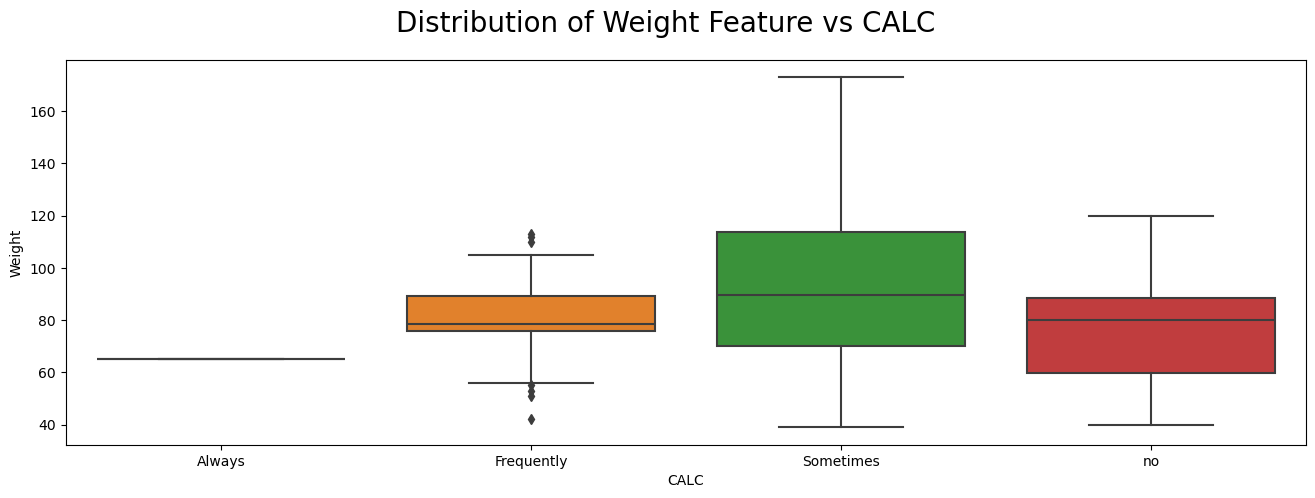

In [14]:
category_EDA("CALC")

Individuals who consume alcohol 'sometimes' have the highest average weight, indicating a possible link between occasional alcohol consumption and higher weight.

##### Weight vs MTRANS

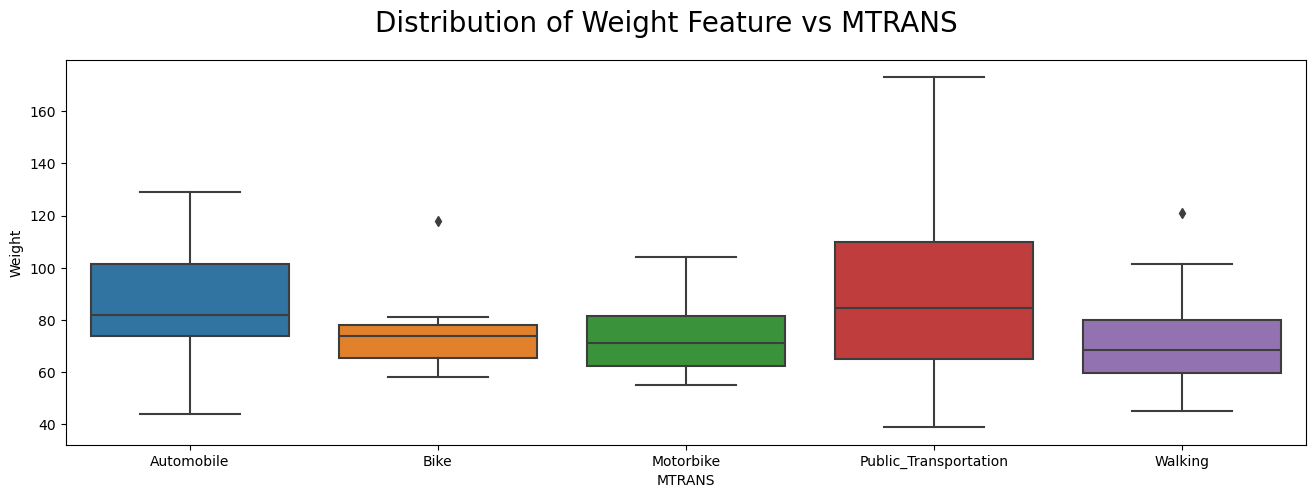

In [15]:
category_EDA("MTRANS")

Individuals who use public transportation or automobiles as their main mode of transport tend to weigh more than those who walk, use a bike, or motorbike.

#### Numerical

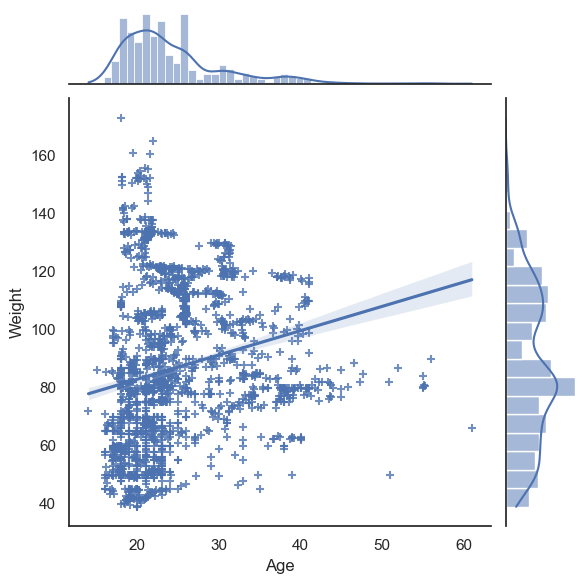

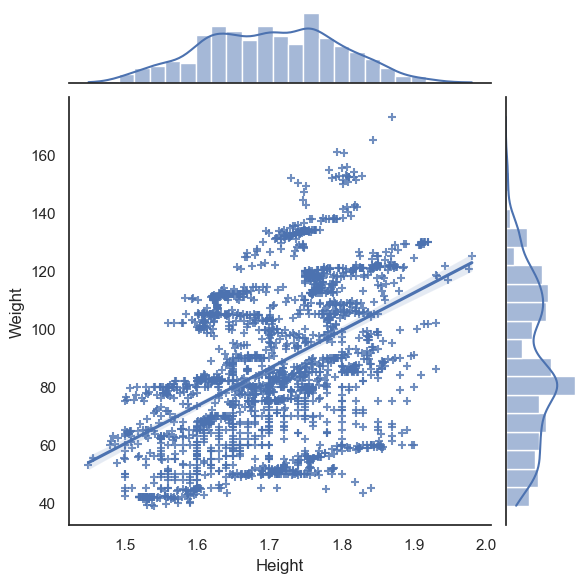

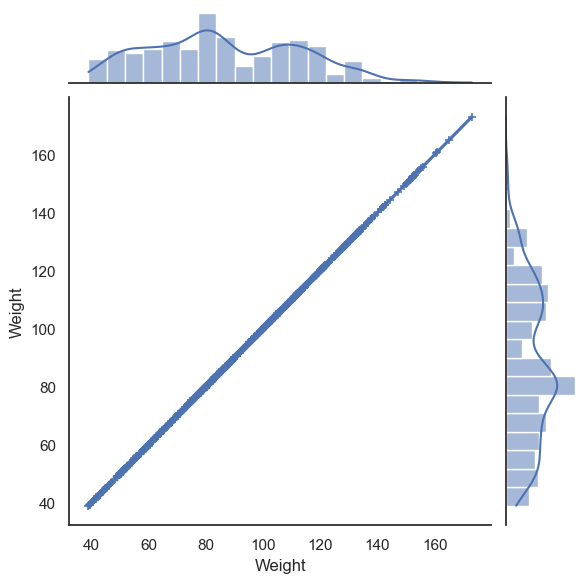

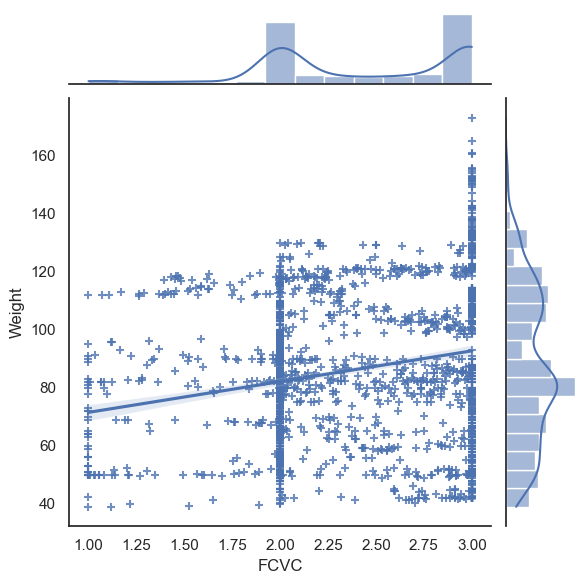

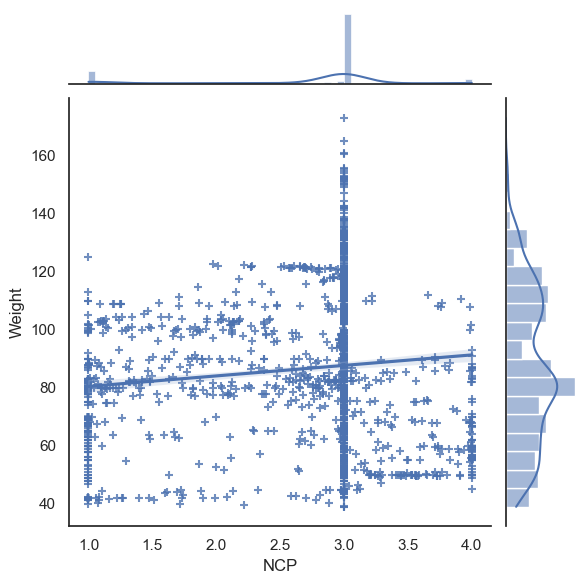

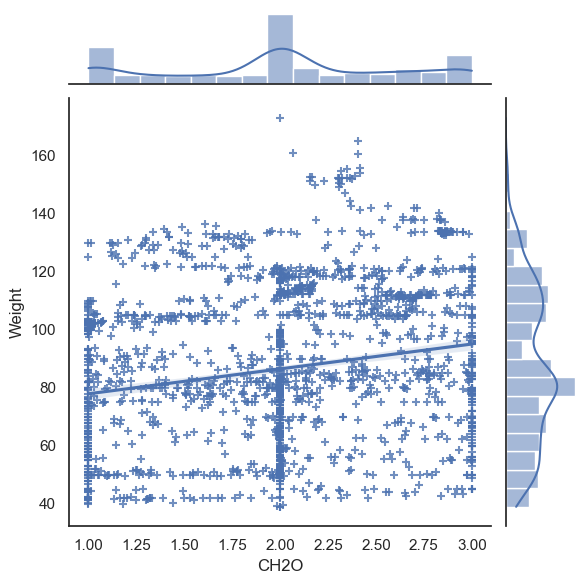

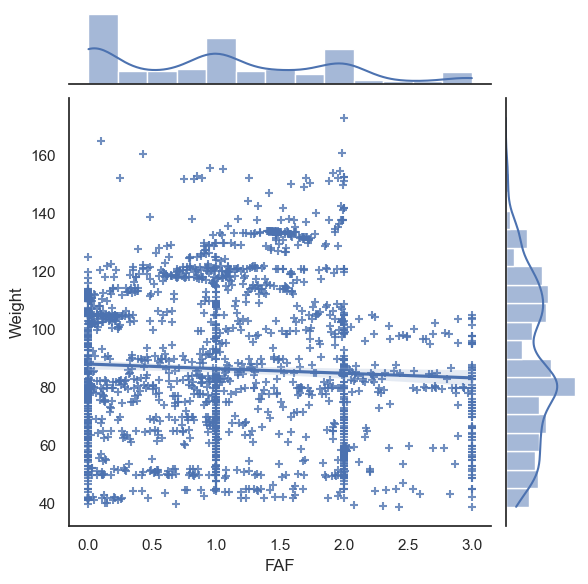

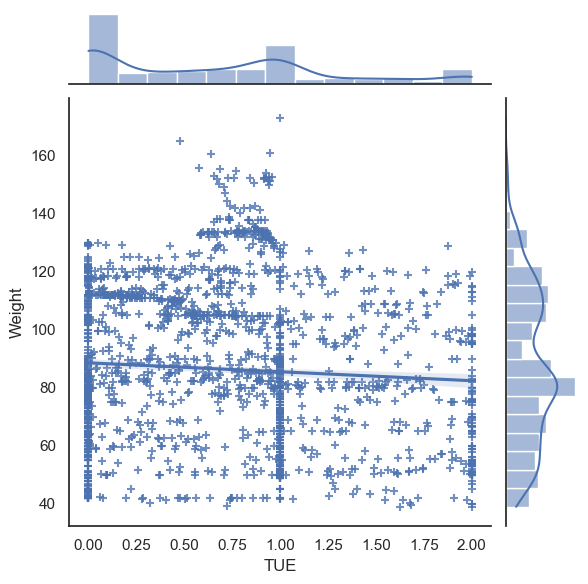

In [16]:
for numerical in ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]:
    sns.set(style='white')
    sns.jointplot(x=numerical, y="Weight", data=data, kind='reg', marker="+")

**1. Weight and Age**

    Correlation Coefficient: 0.20256 (positive)
   
    Interpretation: There is a weak positive correlation between weight and age, indicating that weight tends to slightly increase as age increases.

**2. Weight and Height**

    Correlation Coefficient: 0.463136 (positive)
   
    Interpretation: A moderate positive correlation exists between weight and height, suggesting that taller individuals tend to weigh more.

**3. Weight and FCVC (Frequency of Consumption of Vegetables)**

    Correlation Coefficient: 0.216125 (positive)
   
    Interpretation: A weak positive correlation suggests that individuals who consume vegetables more frequently tend to have a slightly higher weight.

**4. Weight and NCP (Number of Main Meals)**

    Correlation Coefficient: 0.107469 (positive)
   
    Interpretation: There is a very weak positive correlation between the number of main meals and weight.

**5. Weight and FAF (Physical Activity Frequency)**

    Correlation Coefficient: -0.0514363 (negative)
   
    Interpretation: There is a very weak negative correlation between physical activity frequency and weight, suggesting that more frequent physical activity is not strongly associated with lower weight.

**6. Weight and TUE (Time Using Technology Devices)**

    Correlation Coefficient: -0.0715614 (negative)
    
    Interpretation: There is a very weak negative correlation, implying that increased screen time is not strongly associated with higher weight.

**7. Weight and CH2O (Consumption of Water Daily)**

    Correlation Coefficient: 0.200575 (positive)
    
    Interpretation: A weak positive correlation suggests that higher daily water consumption may be associated with slightly increased weight.

### Training SVR

#### Encode Categorical Data

In [17]:
categorical_data = pd.get_dummies(data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [18]:
categorical_data.head()

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,True,False,False,True,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,True,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
2,False,True,False,True,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,False,True,True,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,False,True,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


#### Seperate Numerical Data

In [19]:
numerical_data = data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

#### Join and Convert to Float Dataset

In [20]:
data = pd.concat([numerical_data, categorical_data], axis = 1)
data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,False,True,False,False,False,False,True,False


In [21]:
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   float64
 9   Gender_Male                         2111 non-null   float64
 10  family_history_with_overweight_no   2111 non-null   float64
 11  family_history_with_overweight_yes  2111 no

In [22]:
data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Support Vector Regressor

##### Kernel Gaussian

In [23]:
def gaussian_kernel(x,y,gamma):
    return np.exp(-(np.linalg.norm((x.T-y.T))**2)*gamma)

##### MinMax Scaler

In [24]:
def MinMaxScaler(x_train,x_test):
    minimum = np.min(x_train, axis=0)
    maximum = np.max(x_train,axis= 0)
    x_train = (x_train-minimum)/(maximum-minimum)
    x_test = (x_test-minimum)/(maximum-minimum)
    return x_train,x_test

##### SVR

In [25]:
def train_kernel_gaussian(X, y, c, kernel_param, epsilon):
    m, n = X.shape  # m is the number of datapoints, n is the number of features
    
    # Calculate the kernel function i.e., k(x, x')
    k = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            k[i][j] = gaussian_kernel(X[i, :], X[j, :], kernel_param)
            
    # Matrix P, q, A, b
    element1 = k
    P = np.concatenate((element1, -1 * element1), axis=1)
    P = np.concatenate((P, -1 * P), axis=0)
    q = epsilon * np.ones((2 * m, 1))
    qadd = np.concatenate((-1 * y, y), axis=0)
    q = q + qadd
    A = np.concatenate((np.ones((1, m)), -1 * (np.ones((1, m)))), axis=1)

    # Define optimization with quadratic programming
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(np.zeros((1, 1)))
    
    # Matrix G, h
    c = float(c)
    tem3 = np.concatenate((np.eye(2 * m), -1 * np.eye(2 * m)), axis=0)
    G = cvxopt.matrix(tem3)
    tem4 = np.concatenate((c * np.ones((2 * m, 1)), np.zeros((2 * m, 1))), axis=0)
    h = cvxopt.matrix(tem4)
    
    # Solve the optimization solution
    sol = cvxopt.solvers.qp(P, q, G, h, A, b, solver='glpk')
    
    # Get the Lagrange multiplier
    l = np.ravel(sol['x'])
    
    # Separate to get the 2 sets of Lagrange multipliers
    u = l[0:m]
    v = l[m:]
    
    # Get support vectors
    u1 = u > 1e-5
    v1 = v > 1e-5
    SV = np.logical_or(u1, v1)
    SVindices = np.arange(len(l) / 2)[SV]
    u1 = u[SVindices.astype(int)]
    v1 = v[SVindices.astype(int)]
    support_vectors_x = X[SV]
    support_vectors_y = y[SV]
    
    # Calculate the bias
    bias = sol['y']

    return u1, v1, support_vectors_x, bias

##### Prepare Dataset

In [26]:
X = data.drop('Weight', axis=1).values
y = data['Weight'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [28]:
X_train,X_test = MinMaxScaler(X_train,X_test)

In [29]:
y_train = y_train.reshape((len(X_train), 1))
y_test = y_test.reshape((len(X_test), 1))

##### Set Hyperparameters

In [30]:
c = 1.0  # regularization parameter
kernel_param = 1.0  # kernel parameter for Gaussian kernel
epsilon = 1.2  # epsilon parameter for SVR

##### Train SVR Model

In [31]:
u1,v1,support_vectors_x, bias = train_kernel_gaussian(X_train,y_train,c,kernel_param,epsilon) # training

     pcost       dcost       gap    pres   dres
 0: -1.1277e+05 -8.5264e+04  2e+06  3e+01  5e-16
 1: -3.6339e+04 -6.8357e+04  3e+05  3e+00  5e-16
 2: -1.3054e+04 -5.2608e+04  5e+04  1e-01  5e-16
 3: -1.5308e+04 -2.3688e+04  9e+03  2e-02  4e-16
 4: -1.7094e+04 -1.9324e+04  2e+03  4e-03  4e-16
 5: -1.7505e+04 -1.8667e+04  1e+03  1e-03  4e-16
 6: -1.7815e+04 -1.8191e+04  4e+02  3e-04  4e-16
 7: -1.7911e+04 -1.8053e+04  1e+02  9e-05  4e-16
 8: -1.7958e+04 -1.7989e+04  3e+01  1e-05  4e-16
 9: -1.7971e+04 -1.7974e+04  3e+00  9e-07  4e-16
10: -1.7972e+04 -1.7972e+04  9e-02  4e-09  5e-16
11: -1.7972e+04 -1.7972e+04  1e-03  5e-11  5e-16
Optimal solution found.


### Evaluation

##### Make Predictions

In [32]:
# Initialize predictions array
Y_pred = np.zeros(len(X_test))

# Calculate predictions for each test sample
for i in range(len(X_test)):
    prediction = 0
    for u_, v_, z in zip(u1, v1, support_vectors_x):
        prediction += (u_ - v_) * gaussian_kernel(X_test[i], z, kernel_param)
    Y_pred[i] = prediction

# Add bias to predictions
Y_pred = Y_pred + bias[0, 0]

##### Plot Results

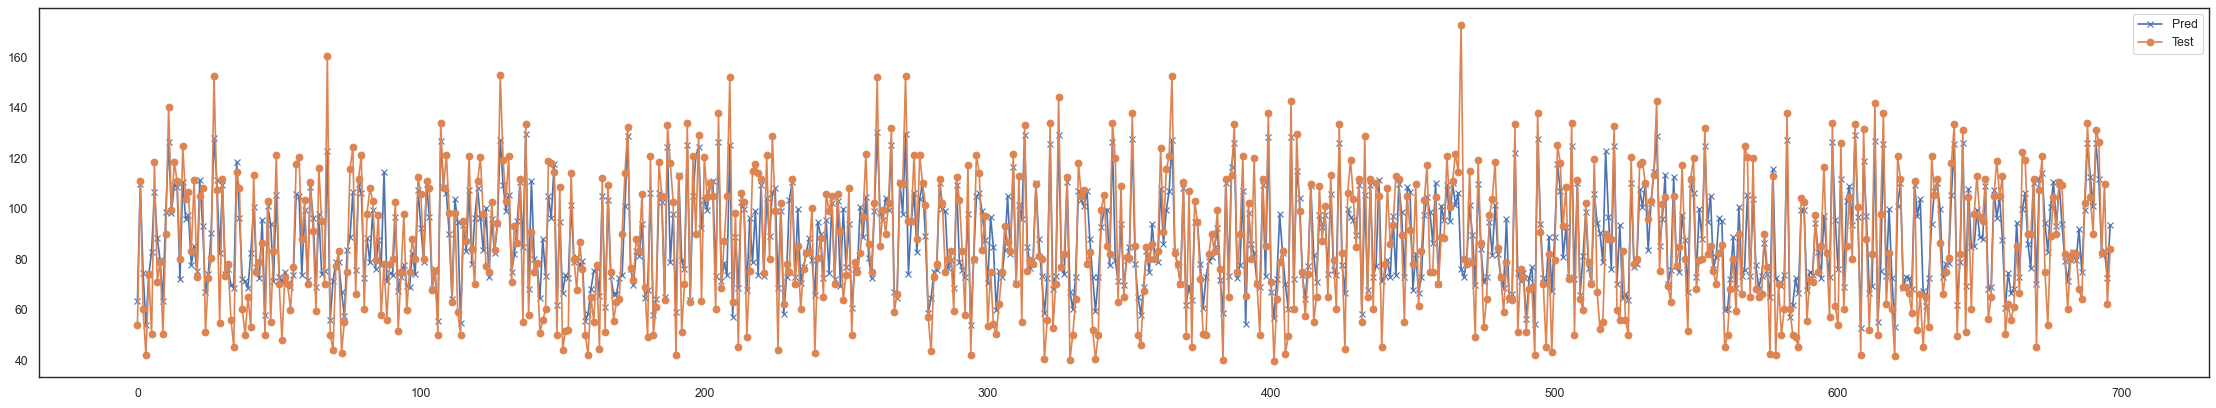

In [33]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(Y_pred, label = "Pred", marker = "x")
plt.plot(y_test, label = "Test", marker = "o")
plt.legend()
plt.show()

##### Error Calculation

In [34]:
# Calculate R-squared error
r2 = r2_score(y_test, Y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, Y_pred)

print("R-squared error:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared error: 0.6995694193293065
Mean Squared Error (MSE): 211.94455657041698


##### Results

R-squared error (0.6995) indicates that approximately 69.95% of the variance in the weight can be explained by the model. This value is reasonable but could potentially be improved.

Mean Squared Error (MSE) of 211.94 indicates the average squared difference between the predicted weight and the actual weight. Lower values of MSE indicate better model performance, so 211.94 suggests that the model is making predictions with some level of accuracy, but there is room for improvement.